## Fraud detection model

## In this fraud detection model we are using amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest, columns as a independent variable and isFraud column as a dependent variable.
## So that we can perform classififcation task using support vector classifier, K nearest neighbour , random forest and logistic regression .
## we can use the model which gives maximum accuracy.
## The amount column is the key factor for predict fraudulent customers because we can classify the fraudulent customer on basis of the amount figure changes in his/her account. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data =pd.read_csv("Fraud.csv")

In [7]:
ds=data.head()
ds

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5 non-null      int64  
 1   type            5 non-null      object 
 2   amount          5 non-null      float64
 3   nameOrig        5 non-null      object 
 4   oldbalanceOrg   5 non-null      float64
 5   newbalanceOrig  5 non-null      float64
 6   nameDest        5 non-null      object 
 7   oldbalanceDest  5 non-null      float64
 8   newbalanceDest  5 non-null      float64
 9   isFraud         5 non-null      int64  
 10  isFlaggedFraud  5 non-null      int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 568.0+ bytes


In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#data['amount'].describe()

In [9]:
#Q1=data.amount.quantile(0.25)
#Q3=data.amount.quantile(0.75)
#Q1,Q3

In [10]:
#IQR = Q3 - Q1
#IQR

In [11]:
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR
#lower_limit,upper_limit

In [12]:
##data[(data.amount<lower_limit)|(data.amount>upper_limit)]

## data cleaning and getting outliers using IQR

In [11]:
df=data['amount']
df.isnull().sum()

0

In [12]:
import numpy as np

In [13]:
df1=sorted(data['amount'])
df1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.02,
 0.02,
 0.02,
 0.03,
 0.03,
 0.04,
 0.06,
 0.07,
 0.09,
 0.1,
 0.11,
 0.11,
 0.14,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.23,
 0.23,
 0.23,
 0.24,
 0.24,
 0.24,
 0.26,
 0.26,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.3,
 0.3,
 0.3,
 0.32,
 0.33,
 0.33,
 0.33,
 0.34,
 0.34,
 0.34,
 0.35,
 0.35,
 0.36,
 0.37,
 0.37,
 0.4,
 0.4,
 0.4,
 0.41,
 0.41,
 0.42,
 0.42,
 0.43,
 0.45,
 0.47,
 0.48,
 0.5,
 0.51,
 0.51,
 0.52,
 0.52,
 0.55,
 0.55,
 0.57,
 0.58,
 0.6,
 0.61,
 0.62,
 0.63,
 0.63,
 0.65,
 0.65,
 0.67,
 0.68,
 0.68,
 0.7,
 0.7,
 0.73,
 0.73,
 0.74,
 0.74,
 0.76,
 0.77,
 0.77,
 0.78,
 0.78,
 0.78,
 0.79,
 0.79,
 0.81,
 0.82,
 0.82,
 0.87,
 0.87,
 0.87,
 0.88,
 0.89,
 0.89,
 0.91,
 0.91,
 0.91,
 0.92,
 0.93,
 0.94,
 0.96,
 0.97,
 0.97,
 0.99,
 1.0,
 1.02,
 1.02,
 1.03,
 1.03,
 1.03,
 1.03,
 1.04,
 1.04,
 1.06,
 1.06,
 1.07,
 1.08,
 1.1,
 1.11,
 1

In [14]:
Q1,Q3 = np.percentile(df1,[25,75])
Q1,Q3

(13389.57, 208721.47750000004)

In [15]:
IQR = Q3-Q1

In [16]:
IQR

195331.90750000003

In [17]:
lower_value =Q1-(1.5*IQR)
upper_value = Q3 + (1.5*IQR)
lower_value,upper_value

(-279608.29125000007, 501719.3387500001)

## checking multicollinearity

In [18]:
ds.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,NaN,1.000000,0.689235,0.644674,-0.458707,NaN,-0.749066,NaN
oldbalanceOrg,NaN,0.689235,1.000000,0.998210,-0.365277,NaN,-0.596495,NaN
newbalanceOrig,NaN,0.644674,0.998210,1.000000,-0.347543,NaN,-0.567535,NaN
oldbalanceDest,NaN,-0.458707,-0.365277,-0.347543,1.000000,NaN,0.612372,NaN
newbalanceDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFraud,NaN,-0.749066,-0.596495,-0.567535,0.612372,NaN,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df4=data.head(50000)
df4

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,9,PAYMENT,1322.91,C1402545110,1208457.61,1207134.71,M578074960,0.0,0.0,0,0
49996,9,PAYMENT,6900.48,C517372485,1207134.71,1200234.22,M1854114037,0.0,0.0,0,0
49997,9,PAYMENT,17399.12,C1948160352,1200234.22,1182835.10,M1940330634,0.0,0.0,0,0
49998,9,PAYMENT,5485.20,C1586381033,1182835.10,1177349.90,M741912557,0.0,0.0,0,0


# Implementation of Support vector classifier

In [21]:
x = df4[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y= df4[['isFraud']]

In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14974     0]
 [   26     0]]


0.9982666666666666

### Fraud detection model using Support Vector Classifier gives us 99% of accuracy

# Implementation of random forest

In [53]:
#df2 = x.describe()
#df2

In [45]:
from sklearn.model_selection import train_test_split
from math import exp

In [46]:
x = df4[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y= df4[['isFraud']]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-62-ea2c99e4aedb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
cr = (classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14974     0]
 [   26     0]]
0.9982666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14974
           1       0.00      0.00      0.00        26

    accuracy                           1.00     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       1.00      1.00      1.00     15000



C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\

## fraud detection model using Random Forest algorithm for classification gives 99% accuracy

# Implementation of knn classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
X = df4[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = df4[['isFraud']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [32]:
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [33]:
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.998


## Fraud detection model using K nearest neighbour gives us 99% accuracy

# Implementation of Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
X = df4[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = df4[['isFraud']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X_train, y_train)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [16]:
y_pred = clf.predict(X_test)

In [17]:
cr = (classification_report(y_test, y_pred))

In [46]:
cm = (metrics.confusion_matrix(y_test, y_pred))
#print(" Confusion Matrix:\n\n cm:\n")

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9980
           1       0.40      0.80      0.53        20

    accuracy                           1.00     10000
   macro avg       0.70      0.90      0.77     10000
weighted avg       1.00      1.00      1.00     10000



In [28]:
a= (metrics.accuracy_score(y_test, y_pred))
print( "Accuracy score:",round(a,1))

Accuracy score: 1.0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

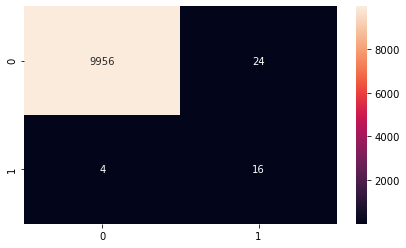

In [31]:
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Roc Curve evaluation


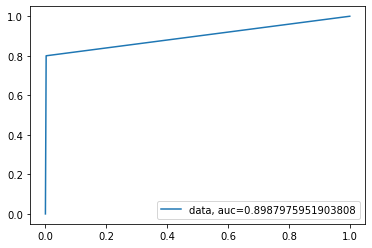

In [40]:
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Logistic regression gives max 100% accuracy for fraud detection so it is preferable for detecting the frauds.